In [2]:
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

In [3]:
# load jimshow functions
def jimshow(image, title=False):
    """imshow with matplotlib dependencies 
    """
    # Acquire default dots per inch value of matplotlib
    dpi = mpl.rcParams['figure.dpi']

    height, width, depth = image.shape
    figsize = width / float(dpi), height / float(dpi)
    
    plt.figure(figsize=figsize)
    
    if depth == 1:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      
    if title:
        plt.title(title)
    plt.axis('off')
    
    plt.show()

def jimshow_channel(image, title=False):
    """
    Modified jimshow() to plot individual channels
    """
    # Acquire default dots per inch value of matplotlib
    dpi = mpl.rcParams['figure.dpi']

    height, width = image.shape
    figsize = width / float(dpi), height / float(dpi)
    
    plt.figure(figsize=figsize)
    
    plt.imshow(image, cmap='gray')
      
    if title:
        plt.title(title)
    plt.axis('off')
    
    plt.show()

__Assignment__

In [4]:
# import image
fname = os.path.join("img","We_Hold_These_Truths.JPG")
image = cv2.imread(fname)
#jimshow(image)
print(image.shape)

(3240, 4320, 3)


In [5]:
image = cv2.imread(fname)
# Find region of interest (ROI)

# define properties
upper_left = (1385, 880)
bottom_right = (2890, 2800)
color_green = (0, 255, 0)
thickness = 5

# draw rectangle on the picture
image_with_ROI = cv2.rectangle(image.copy(), upper_left, bottom_right, color_green, thickness)

# create a filename with img/ path
filename_ROI = 'img/image_with_ROI.jpg'

# Using cv2.imwrite() method to save the image 
cv2.imwrite(filename_ROI, image_with_ROI)

#jimshow(imageRectangle)

True

Crop the original image to create a new image containing only the ROI in the rectangle. Save this as image_cropped.jpg.

In [6]:

image_cropped = image[upper_left[1]: bottom_right[1], upper_left[0]:bottom_right[0]]

# create a filename with img/ path
filename_crop = 'img/image_cropped.jpg'

# Using cv2.imwrite() method to save the image 
cv2.imwrite(filename_crop, image_cropped)

#jimshow(image_cropped)
#cv2.imshow("cropped", crop_img)
#cv2.waitKey(0)

True

Using this cropped image, use Canny edge detection to 'find' every letter in the image

In [7]:
# From BGR to grey
grey_image = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)

# Gaussian blurring of the image
blurred = cv2.GaussianBlur(grey_image, (5,5), 0) 

canny = cv2.Canny(blurred, 75, 140)
# we can adjust the threshold with trial and error

#jimshow_channel(canny, "Canny edge detection")

Draw a green contour around each letter in the cropped image. Save this as image_letters.jpg

In [8]:
# Get contours
(contours, _) = cv2.findContours(canny.copy(), 
                
                # hierachy, if there is an outer structure, this one will be kept - the inner removed
                cv2.RETR_EXTERNAL, 
                cv2.CHAIN_APPROX_SIMPLE)

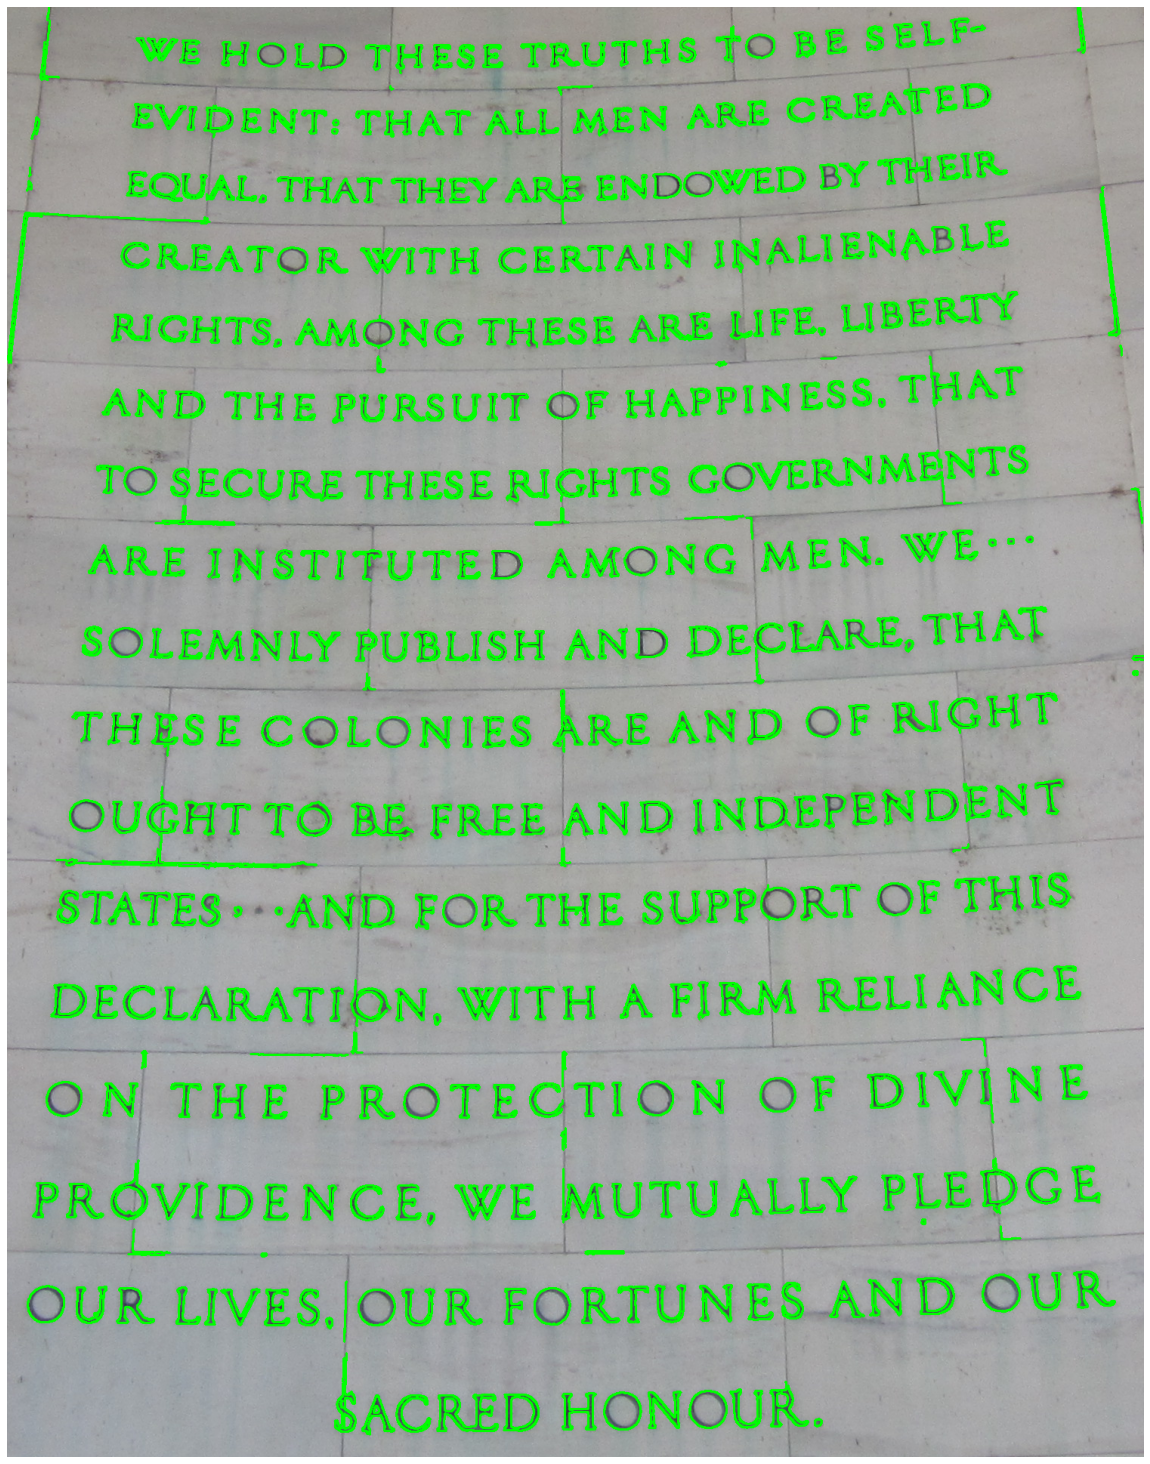

In [9]:
jimshow(cv2.drawContours(image_cropped.copy(), 
                         contours, 
                         -1, # -1 is all coins, 0,1,2 etc. is one coin at a time
                         (0,255,0), # Adding a green color
                         2))

In [10]:

image_letters = cv2.drawContours(image_cropped.copy(), 
                         contours, 
                         -1, # -1 is all coins, 0,1,2 etc. is one coin at a time
                         (0,255,0), # Adding a green color
                         2)


# create a filename with img/ path
filename_letters = 'img/image_letters.jpg'

# Using cv2.imwrite() method to save the image 
cv2.imwrite(filename_letters, image_letters)

True